# World University Rankings
#### Investigate the best universities in the world
This dataset provides a comprehensive comparison of three major global university ranking systems (THE, ARWU, CWUR) and includes supplementary data on educational attainment and expenditure, allowing for analysis of how these factors relate to university quality and rankings.



## About Dataset
Of all the universities in the world, which are the best?

Ranking universities is a difficult, political, and controversial practice. There are hundreds of different national and international university ranking systems, many of which disagree with each other. This dataset contains three global university rankings from very different places.




### Supplementary Data
The Times Higher Education World University Ranking is widely regarded as one of the most influential and widely observed university measures. Founded in the United Kingdom in 2010, it has been criticized for its commercialization and for undermining non-English-instructing institutions.

The Academic Ranking of World Universities, also known as the Shanghai Ranking, is an equally influential ranking. It was founded in China in 2003 and has been criticized for focusing on raw research power and for undermining humanities and quality of instruction.

The Center for World University Rankings, is a less well know listing that comes from Saudi Arabia, it was founded in 2012.

How do these rankings compare to each other?
Are the various criticisms levied against these rankings fair or not?
How does your alma mater fare against the world?es.




### University Ranking Data
To further extend your analyses, we've also included two sets of supplementary data.

The first of these is a set of data on educational attainment around the world. It comes from The World Data Bank and comprises information from the UNESCO Institute for Statistics and the Barro-Lee Dataset. How does national educational attainment relate to the quality of each nation's universities?

The second supplementary dataset contains information about public and private direct expenditure on education across nations. This data comes from the National Center for Education Statistics. It represents expenditure as a percentage of gross domestic product. Does spending more on education lead to better international university rankings?world?es.




In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [127]:
mydata = pd.read_csv(r'world university ranking.csv')

In [128]:
mydata.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


In [129]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [130]:
mydata.describe()

,teaching,research,citations,student_staff_ratio,year
count,2603.000000,2603.000000,2603.000000,2544.000000,2603.000000
mean,37.801498,35.910257,60.921629,18.445283,2014.075682
std,17.604218,21.254805,23.073219,11.458698,1.685733
min,9.900000,2.900000,1.200000,0.600000,2011.000000
25%,24.700000,19.600000,45.500000,11.975000,2013.000000
50%,33.900000,30.500000,62.500000,16.100000,2014.000000
75%,46.400000,47.250000,79.050000,21.500000,2016.000000
max,99.700000,99.400000,100.000000,162.600000,2016.000000


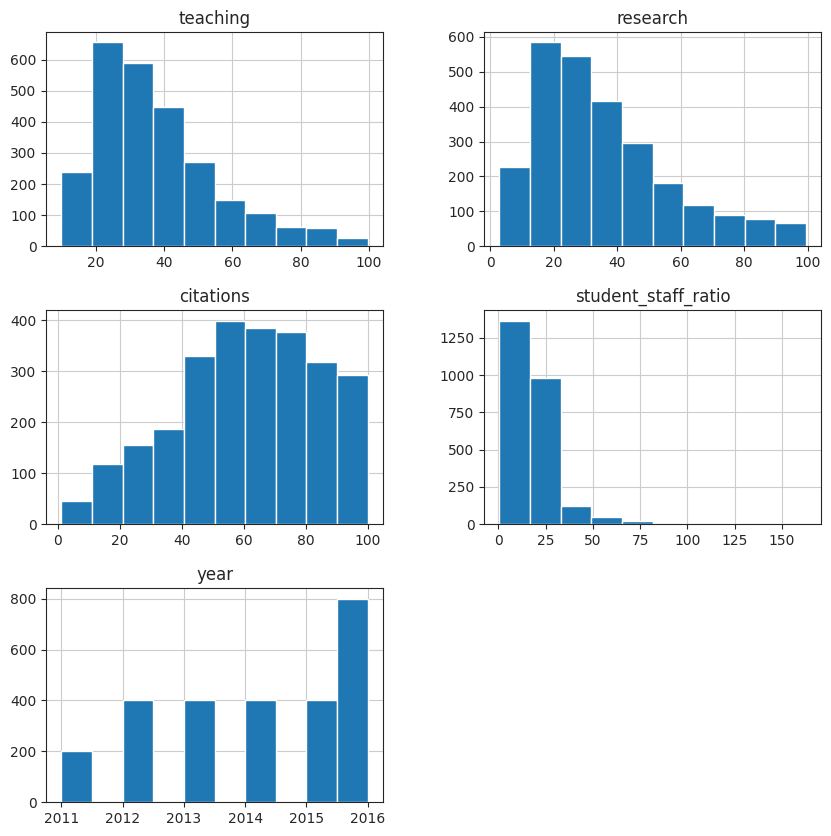

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

mydata.hist(figsize=(10,10))
plt.show()

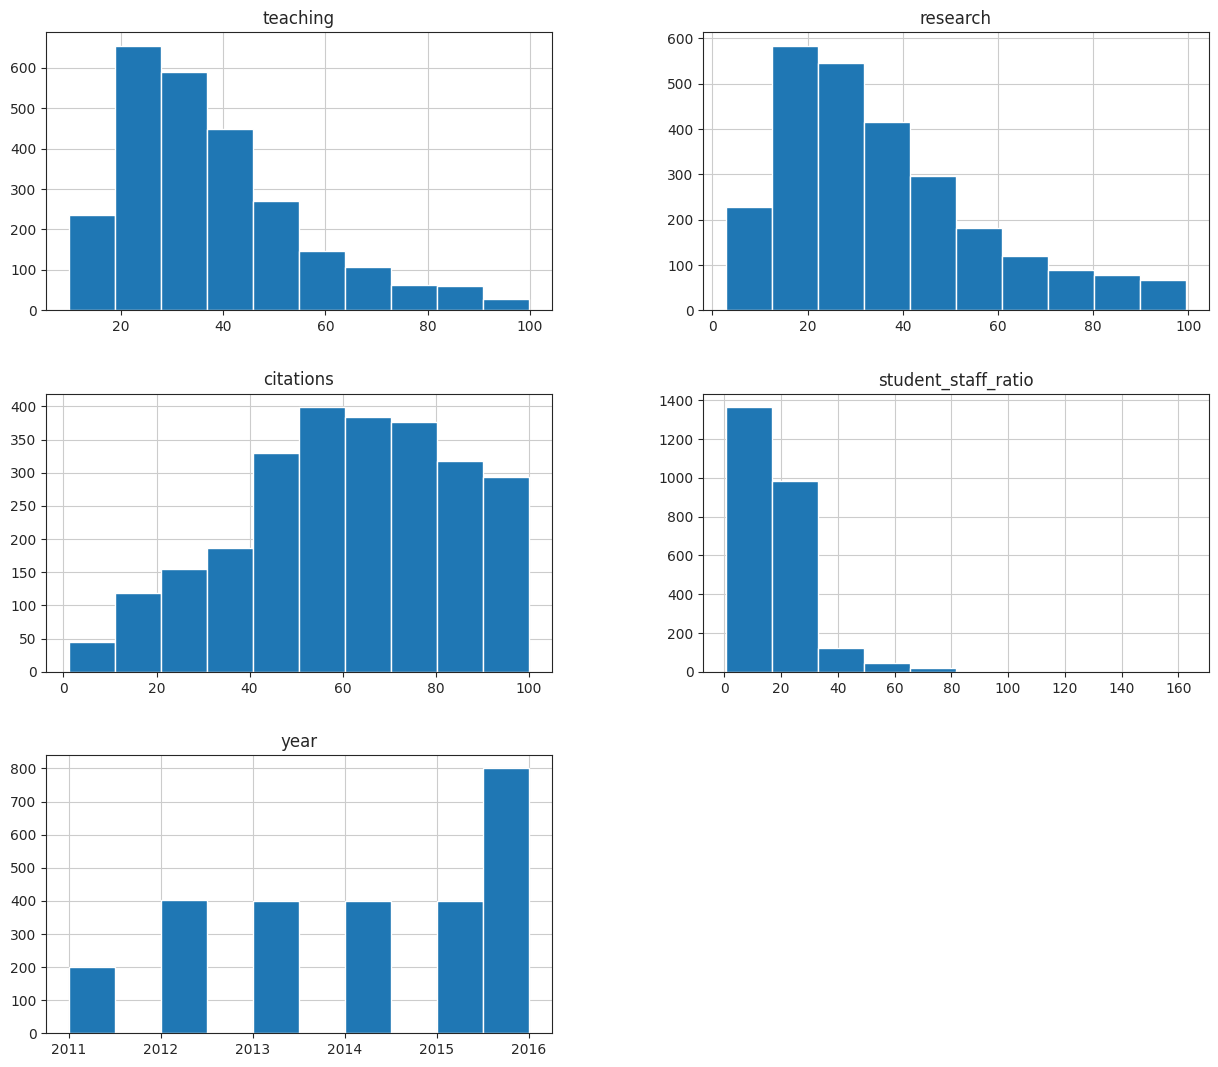

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

mydata.hist(figsize=(15,13))
plt.show()

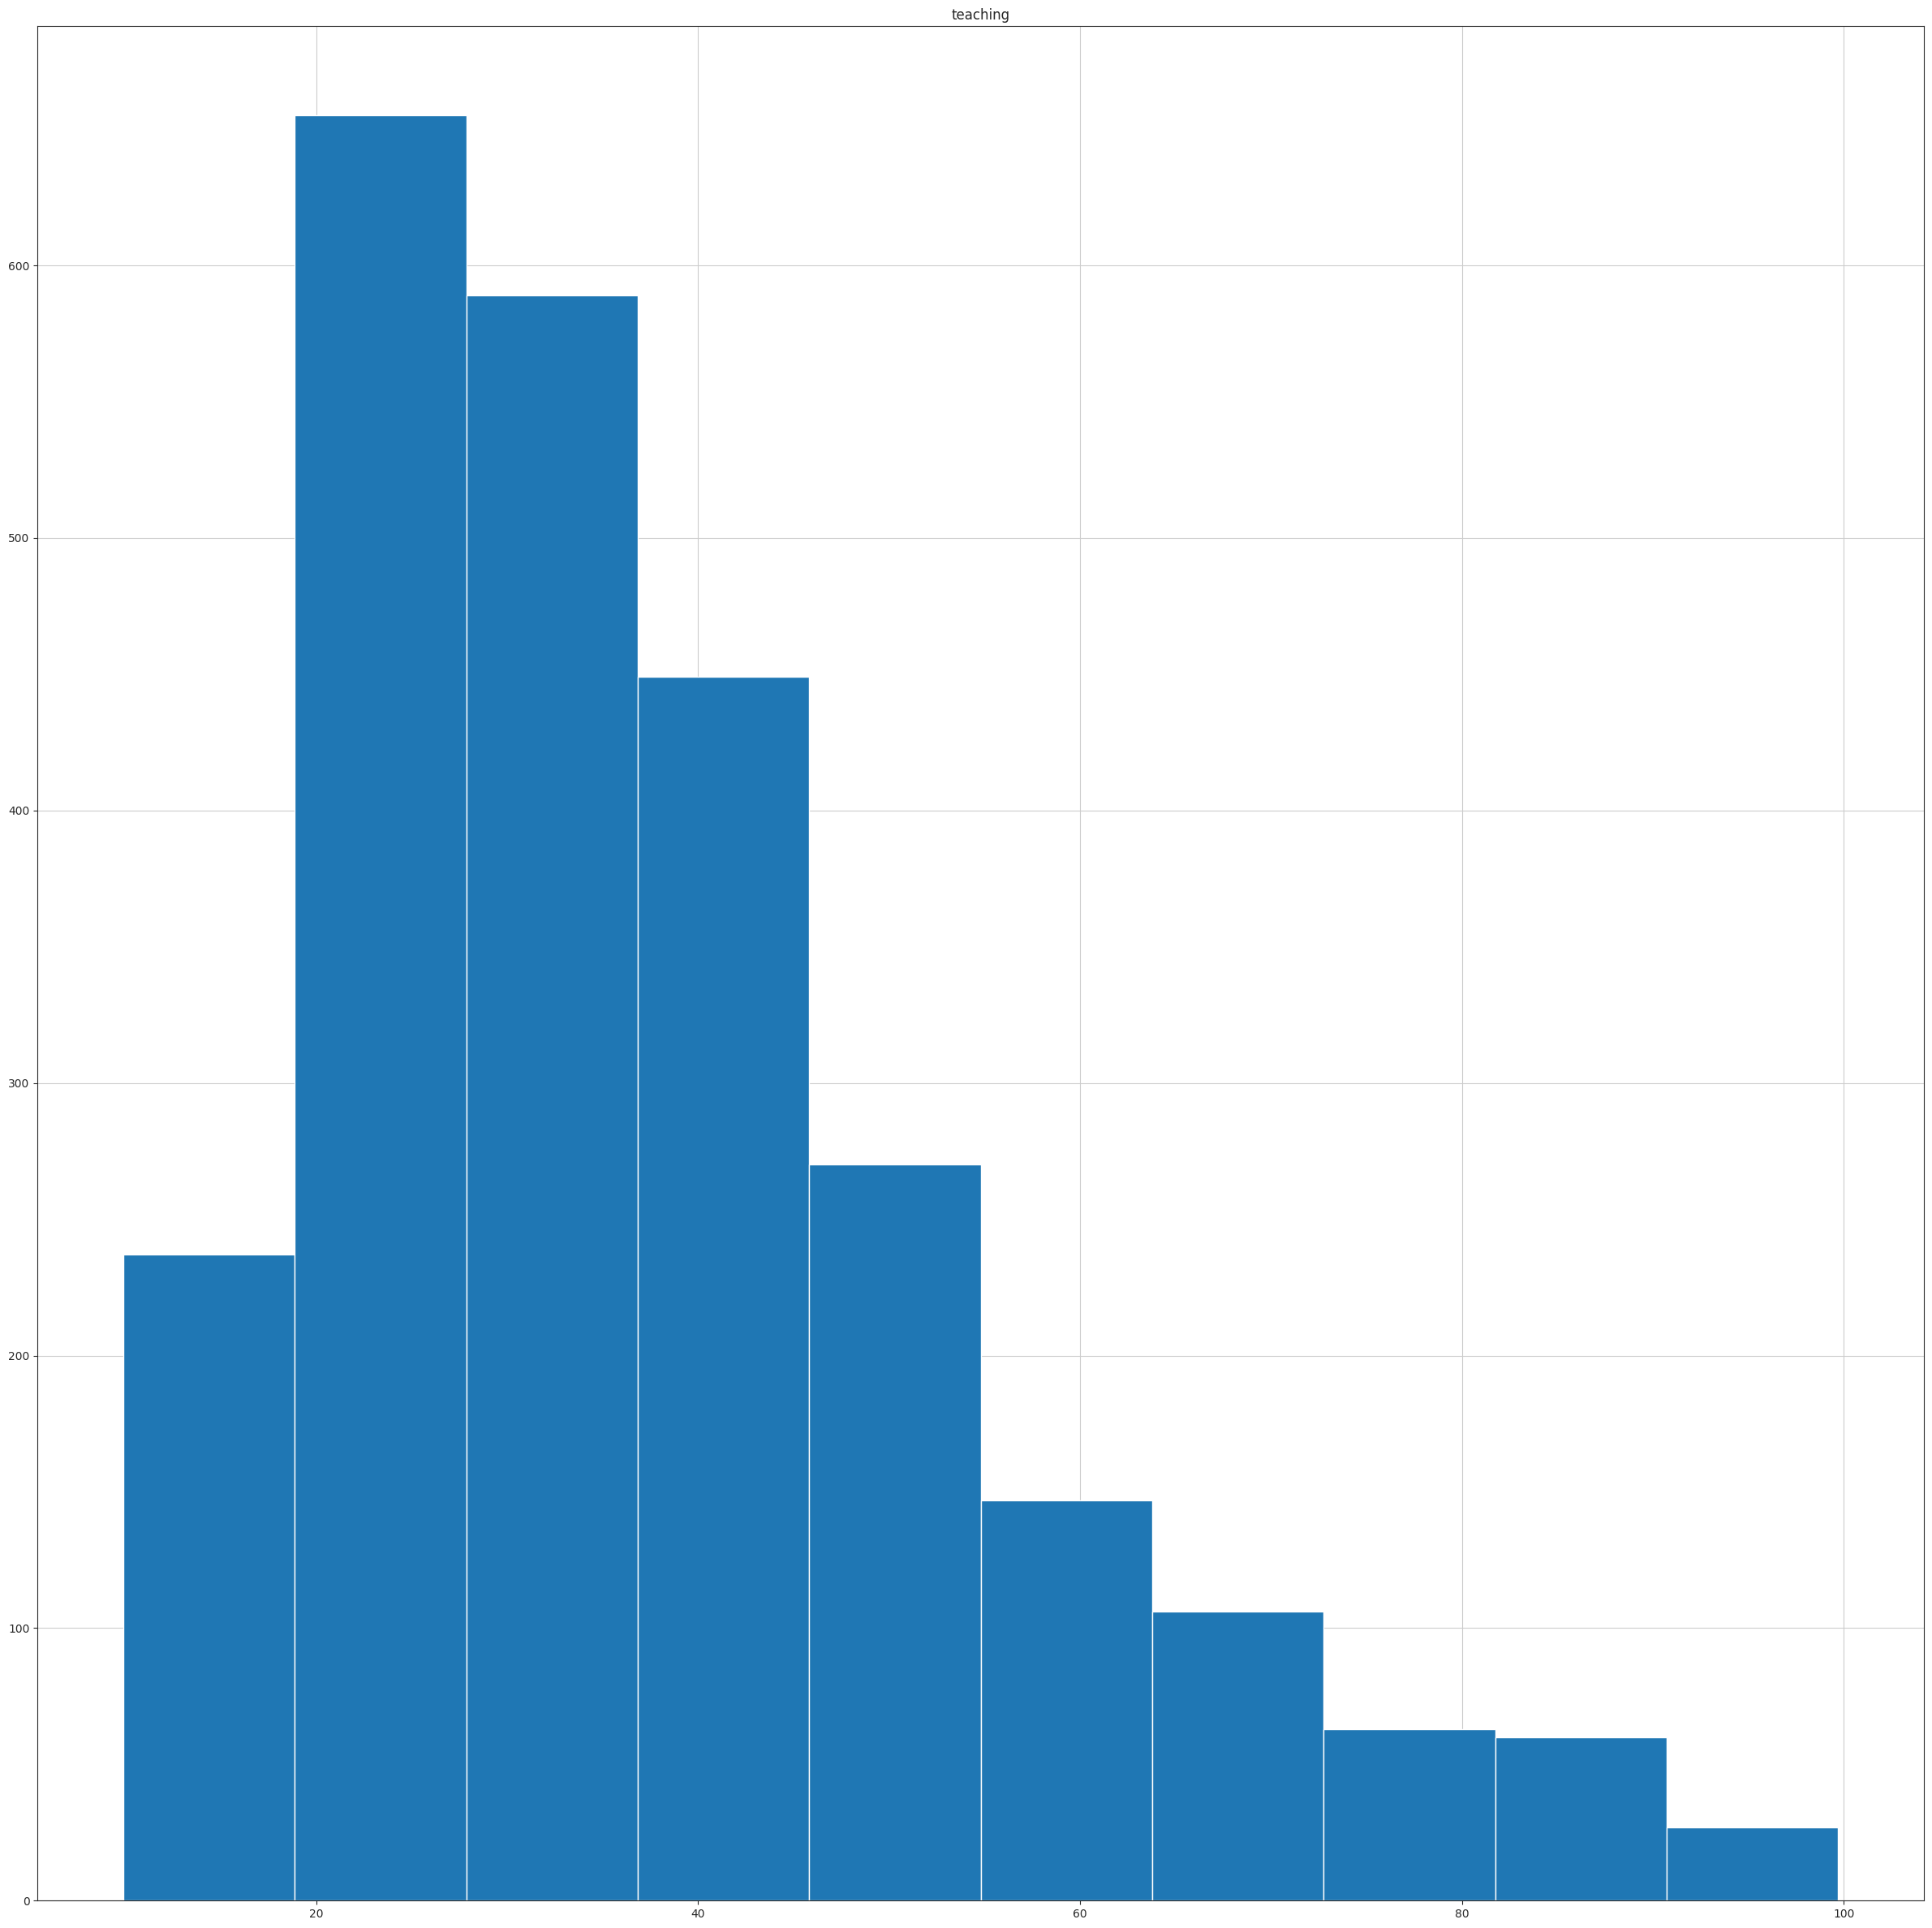

In [133]:
mydata.hist(['teaching'], figsize=(30,30))
plt.show()

<Axes: xlabel='country', ylabel='teaching'>

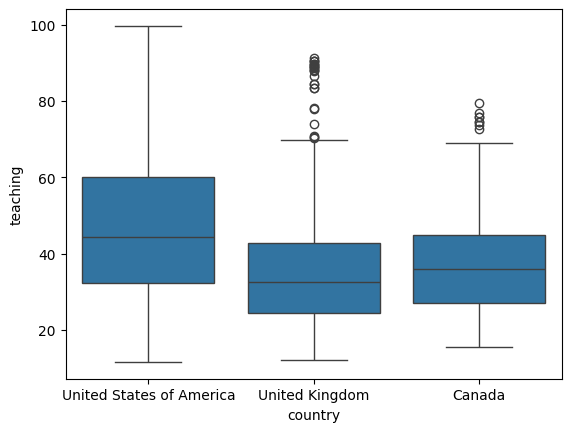

In [45]:
import seaborn as sns
locations_to_include = ["United States of America", "United Kingdom", "Canada"]
filtered_data = mydata[mydata['country'].isin(locations_to_include)]
sns.boxplot(x="country", y="teaching", data=filtered_data)

In [44]:
pd.crosstab(mydata['university_name'].head(8),mydata['international_students'].head(8) )

international_students,15%,22%,25%,27%,33%,34%
university_name,,,,,,
California Institute of Technology,0,0,0,1,0,0
Harvard University,0,0,1,0,0,0
Massachusetts Institute of Technology,0,0,0,0,1,0
Princeton University,0,0,0,1,0,0
Stanford University,0,1,0,0,0,0
"University of California, Berkeley",1,0,0,0,0,0
University of Cambridge,0,0,0,0,0,1
University of Oxford,0,0,0,0,0,1


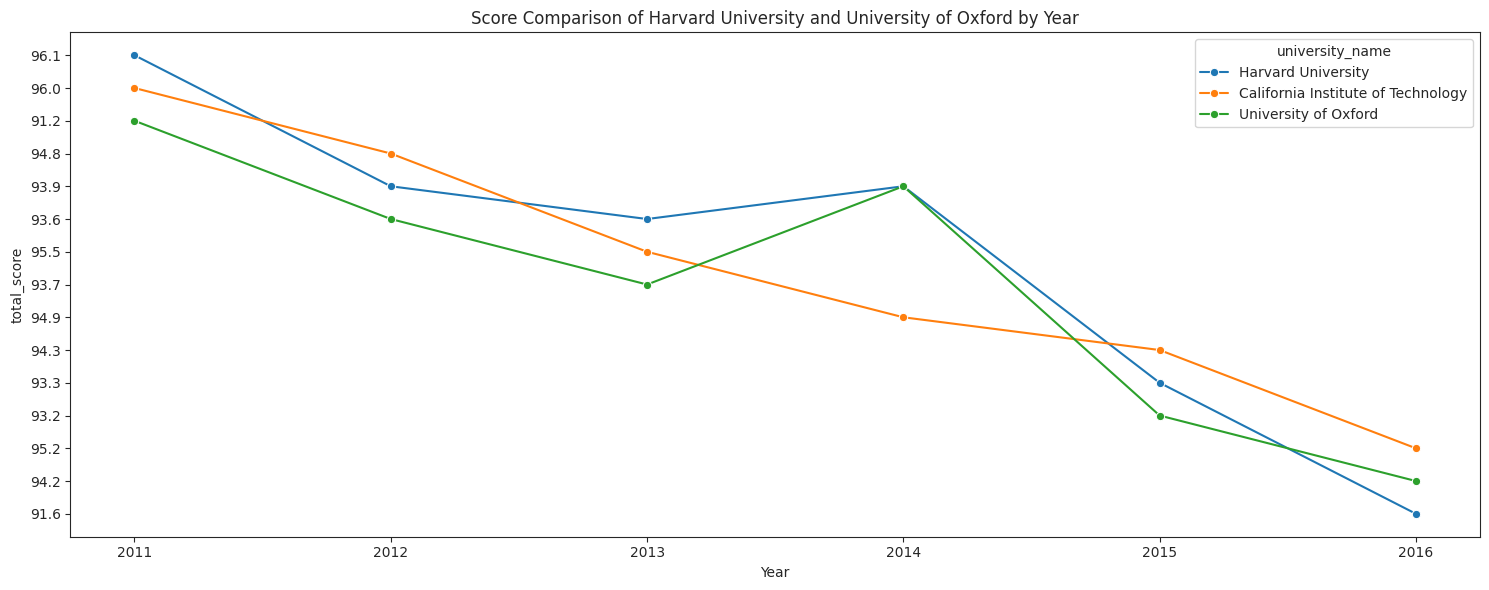

In [134]:
locations_to_include = ["Harvard University", "University of Oxford","California Institute of Technology"]
filtered_data = mydata[mydata['university_name'].isin(locations_to_include)]

plt.figure(figsize=(15, 6))
sns.lineplot(x="year", y="total_score", hue="university_name", data=filtered_data, marker="o")
plt.xlabel('Year')
plt.ylabel('total_score')
plt.title('Score Comparison of Harvard University and University of Oxford by Year')
plt.tight_layout()
plt.show()

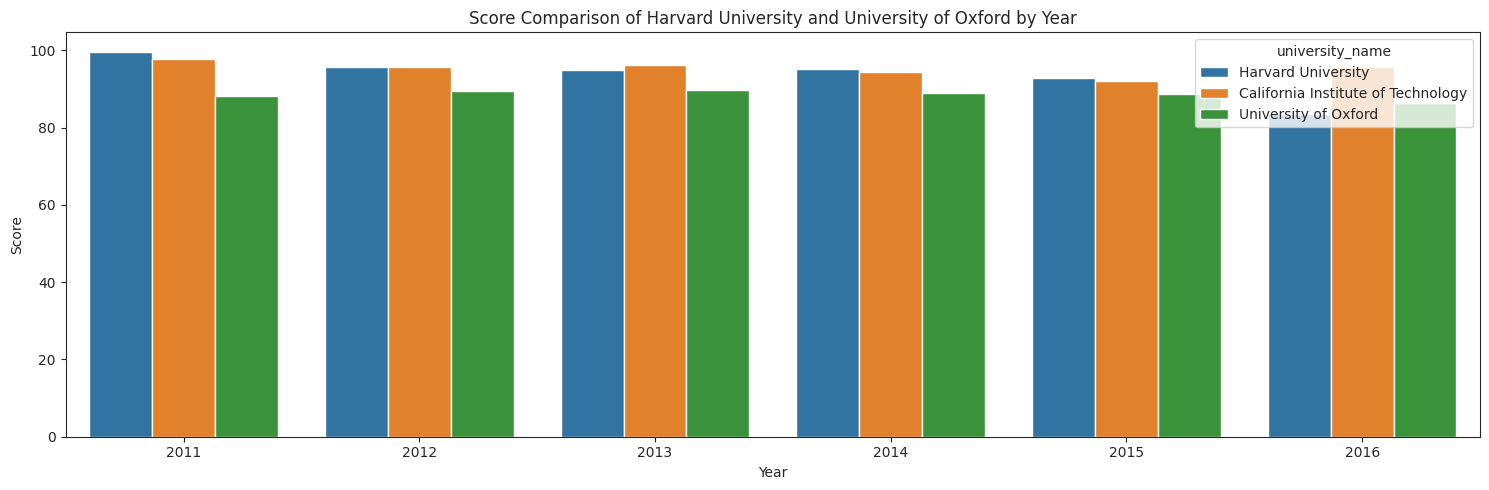

In [138]:
locations_to_include = ["Harvard University", "University of Oxford","California Institute of Technology"]
filtered_data = mydata[mydata['university_name'].isin(locations_to_include)]

plt.figure(figsize=(15, 5))
sns.barplot(x="year", y="teaching", hue="university_name", data=filtered_data)
plt.xlabel('Year')
plt.ylabel('Score')
plt.title('Score Comparison of Harvard University and University of Oxford by Year')
plt.tight_layout()
plt.show()


In [56]:
pd.pivot_table(mydata.head(8), index=['university_name', 'world_rank', 'female_male_ratio'],
                     columns=['year'], aggfunc=len)

,,,citations,country,income,international,international_students,num_students,research,student_staff_ratio,teaching,total_score
,,year,2011,2011,2011,2011,2011,2011,2011,2011,2011,2011
university_name,world_rank,female_male_ratio,,,,,,,,,,
California Institute of Technology,2,33 : 67,1,1,1,1,1,1,1,1,1,1
Massachusetts Institute of Technology,3,37 : 63,1,1,1,1,1,1,1,1,1,1
Princeton University,5,45 : 55,1,1,1,1,1,1,1,1,1,1
Stanford University,4,42 : 58,1,1,1,1,1,1,1,1,1,1
"University of California, Berkeley",8,50 : 50,1,1,1,1,1,1,1,1,1,1
University of Cambridge,6,46 : 54,1,1,1,1,1,1,1,1,1,1
University of Oxford,6,46 : 54,1,1,1,1,1,1,1,1,1,1


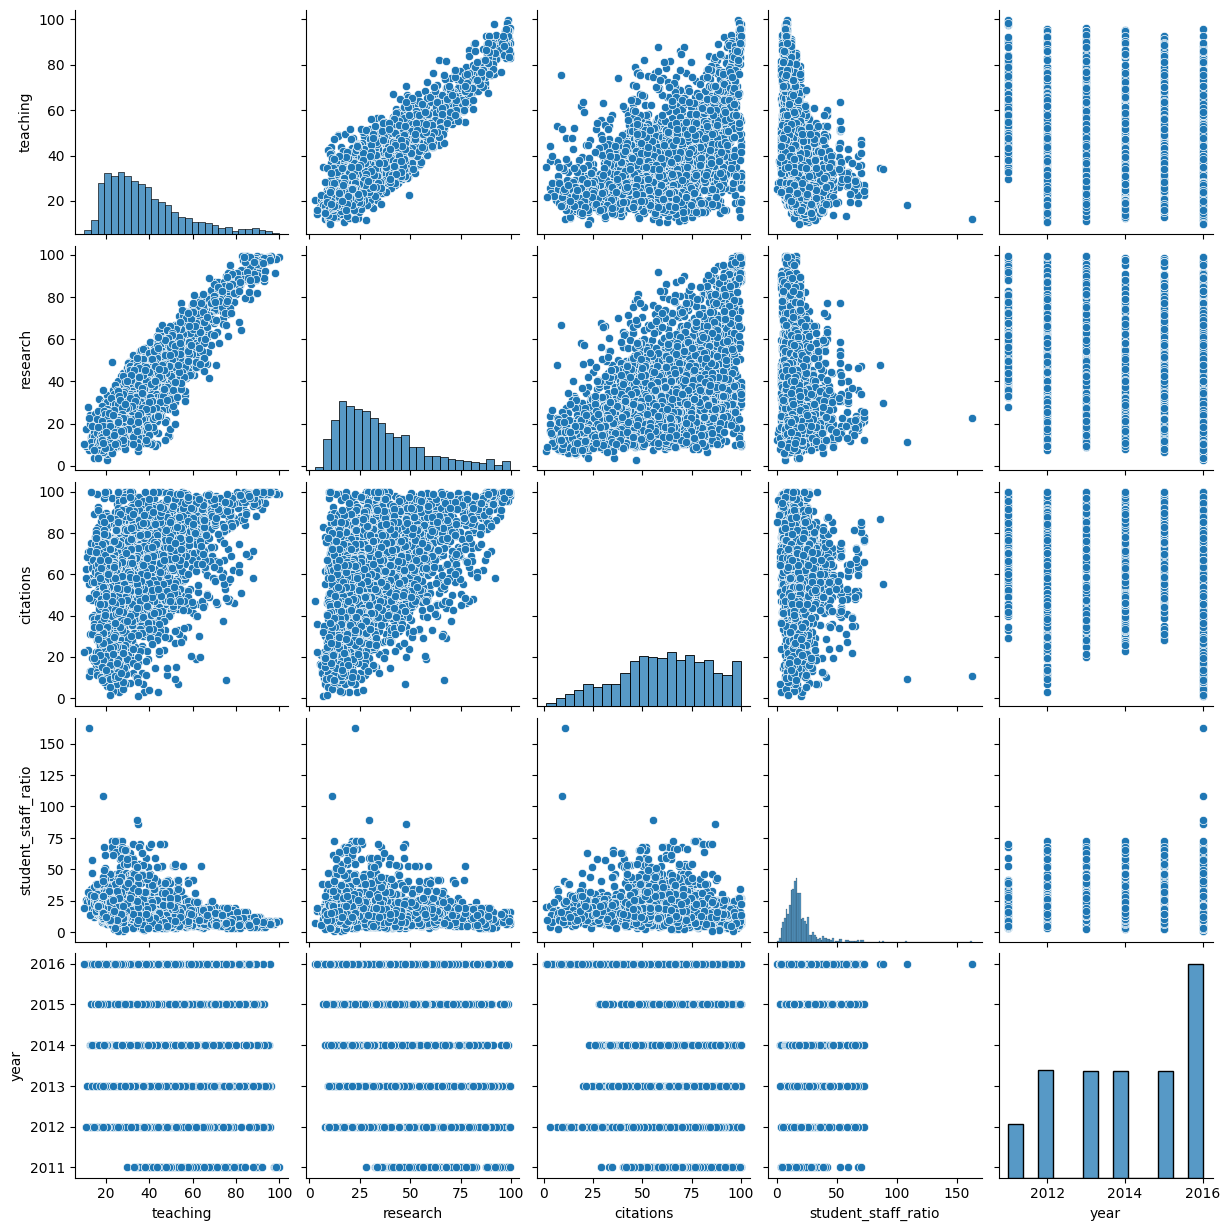

In [57]:
sns.pairplot(mydata)

In [59]:
mydata['teaching'].std()

17.604218104309044

In [60]:
mydata['teaching'].mean()

37.801498271225505

In [61]:
mydata['teaching'].median()

33.9

<ipython-input-62-db9f491c2e20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mydata['teaching'])


<Axes: xlabel='teaching', ylabel='Density'>

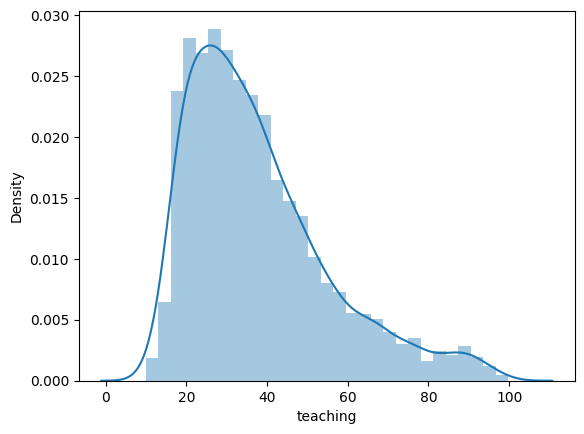

In [62]:
sns.distplot(mydata['teaching'])

array([[<Axes: title={'center': 'Canada'}>,
        <Axes: title={'center': 'United Kingdom'}>],
       [<Axes: title={'center': 'United States of America'}>, <Axes: >]],
      dtype=object)

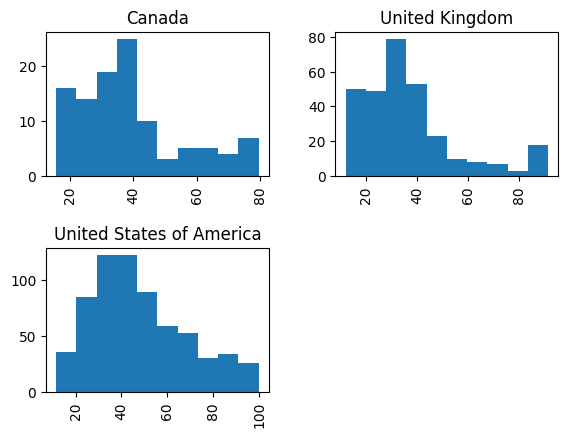

In [67]:
locations_to_include = ["United States of America", "United Kingdom", "Canada"]
filtered_data = mydata[mydata['country'].isin(locations_to_include)]
filtered_data.hist(by='country', column='teaching')

array([[<Axes: title={'center': 'Harvard University'}>,
        <Axes: title={'center': 'Stanford University'}>],
       [<Axes: title={'center': 'University of Oxford'}>, <Axes: >]],
      dtype=object)

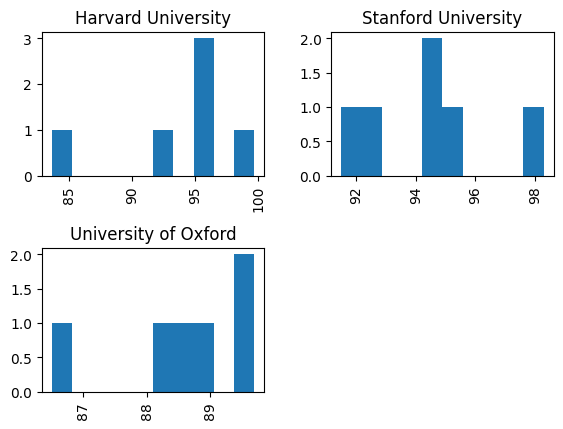

In [70]:
locations_to_include = ["Harvard University", "University of Oxford","Stanford University"]
filtered_data = mydata[mydata['university_name'].isin(locations_to_include)]
filtered_data.hist(by='university_name', column='teaching')

array([[<Axes: title={'center': 'Harvard University'}>,
        <Axes: title={'center': 'Stanford University'}>],
       [<Axes: title={'center': 'University of Oxford'}>, <Axes: >]],
      dtype=object)

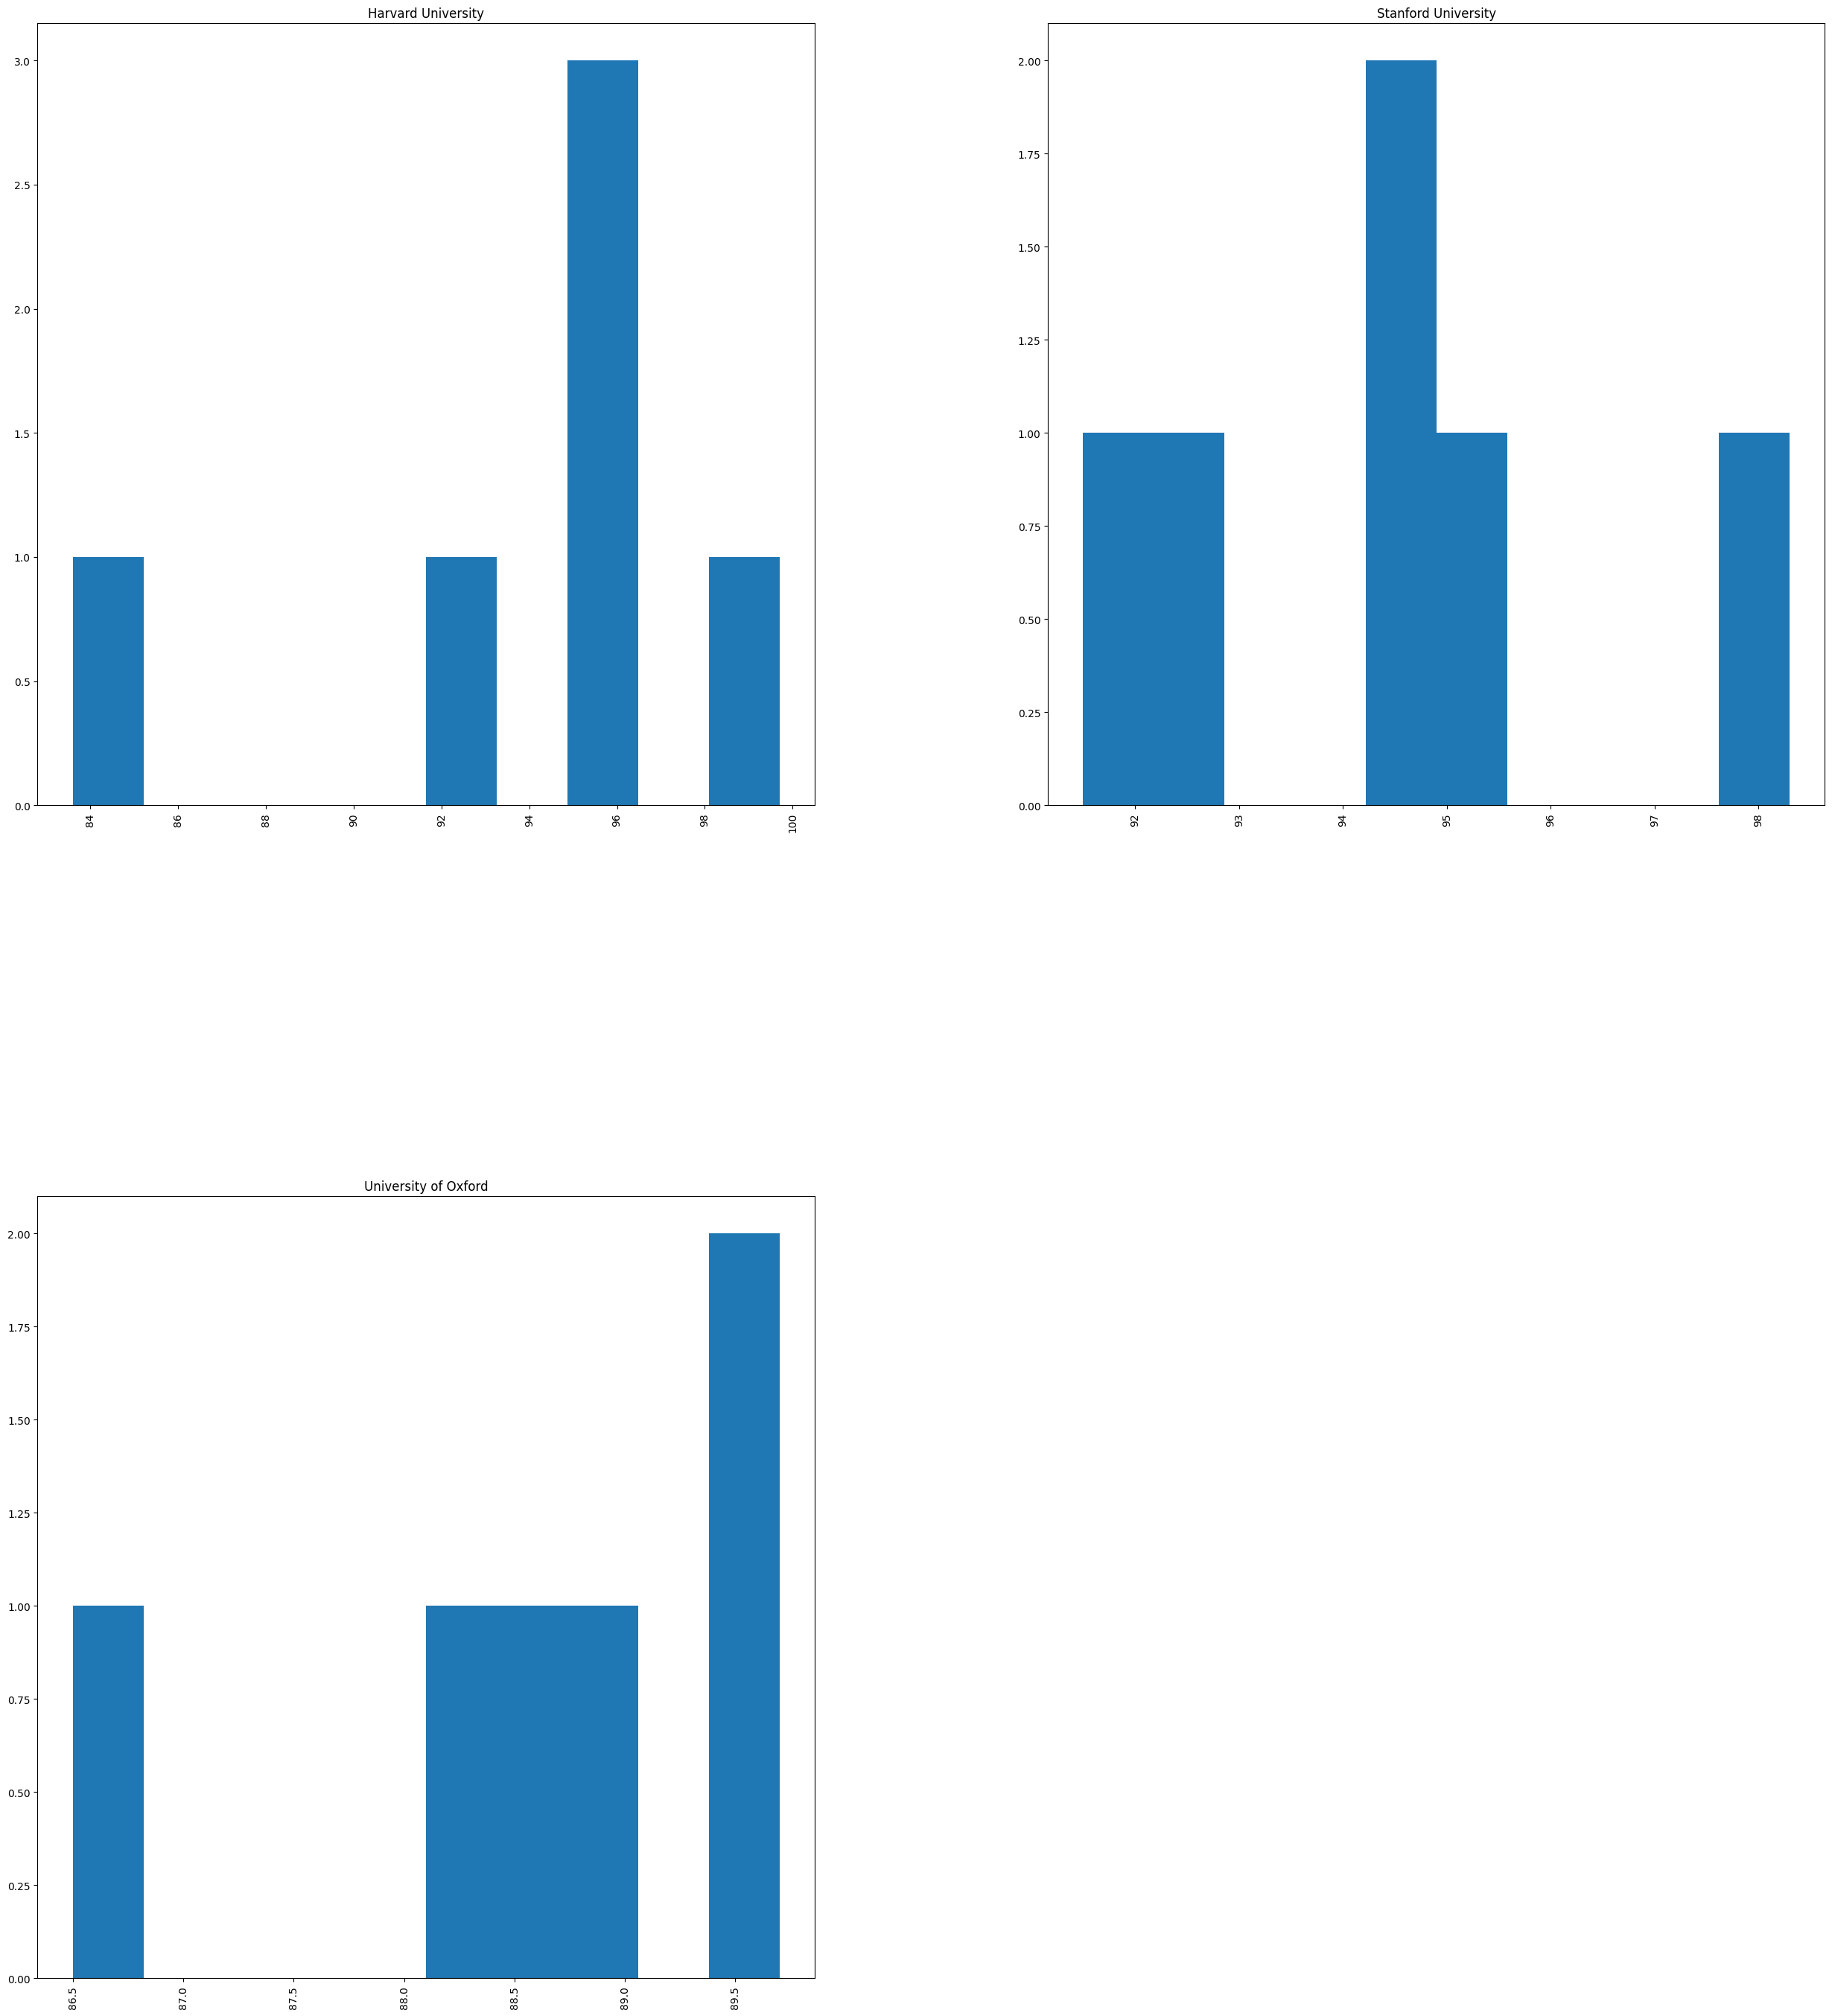

In [73]:
locations_to_include = ["Harvard University", "University of Oxford","Stanford University"]
filtered_data = mydata[mydata['university_name'].isin(locations_to_include)]
filtered_data.hist(by='university_name', column='teaching', figsize=(30,35))

In [76]:
np.random.seed(1000)

In [77]:
x = st.skewnorm.rvs(1, size=1000)

In [78]:
x[3:10]

array([ 0.1973709 , -0.80378143,  0.53244858, -0.00533902,  1.64929618,
        1.24759357, -0.11035221])

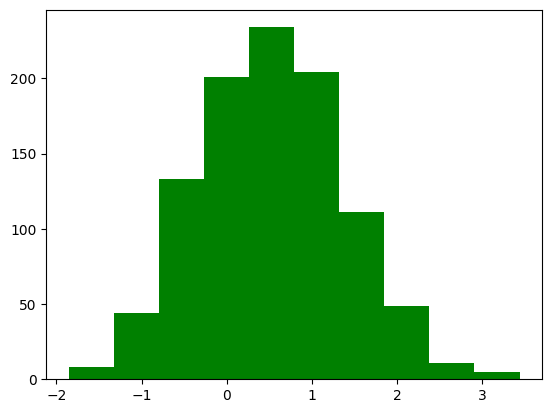

In [79]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'green')

In [80]:
xbar = x.mean()
xbar

0.5339279505443328

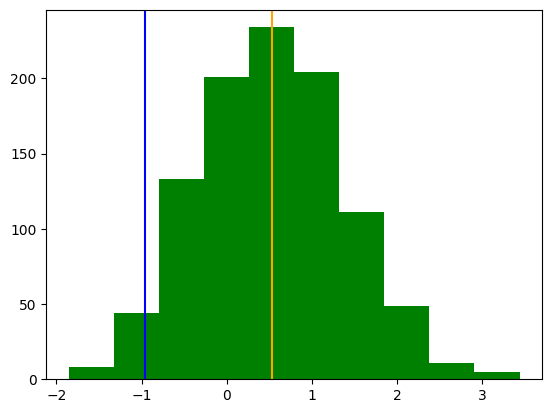

In [81]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
plt.axvline(x = x.mean()-1.5, color='blue')

_ = plt.hist(x, color = 'green')

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

In [82]:
xbar = x.mean()
xbar

0.5339279505443328

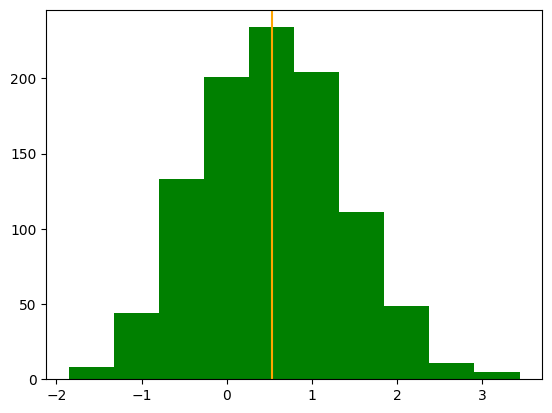

In [83]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='orange')
_ = plt.hist(x, color = 'green')

#### Median

The second most common measure of central tendency is the **median**, the midpoint value in the distribution:

In [84]:
np.median(x)

0.5196670160153241

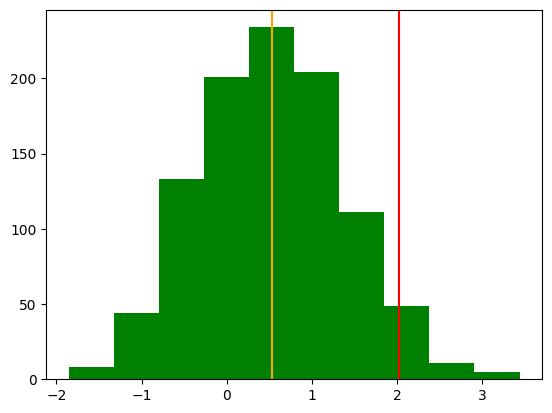

In [85]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x)+1.5, color='red')
_ = plt.hist(x, color = 'green')

### Measures of Dispersion

#### Variance

$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [86]:
x.var()

0.7171595691263156

#### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution:
$$ \sigma = \sqrt{\sigma^2} $$

In [87]:
sigma = x.std()
sigma

0.846852743472155

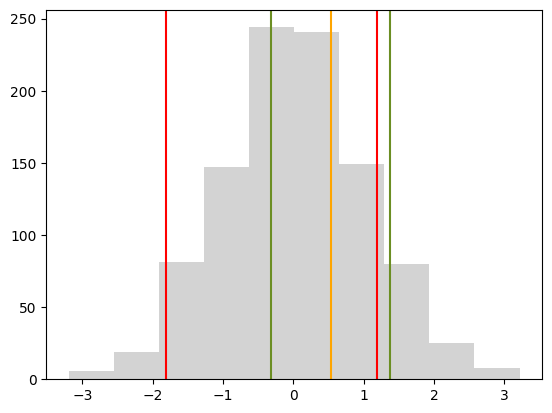

In [88]:
fig, ax = plt.subplots()
x = st.skewnorm.rvs(0, size=1000)

plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
plt.axvline(x = xbar-sigma+1.5, color='red')
plt.axvline(x = xbar-sigma-1.5, color='red')
_ = plt.hist(x, color = 'lightgray')

<div class="alert alert-block alert-success">
<b>Project done in 2024/16/5</b>
</div>

#### Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [89]:
sigma/(x.size)**(1/2)

0.026779835121342993

In [90]:
st.sem(x)

0.03199949048732758

In [91]:
st.sem(x, ddof=0)

0.03198348674014639

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.

## Gaussian Distribution

In [92]:
x = np.random.normal(size=150000)

In [93]:
sns.set_style('ticks')

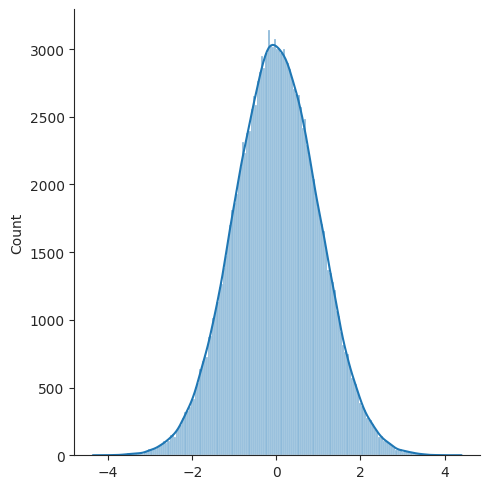

In [94]:
_ = sns.displot(x, kde=True)

In [95]:
x.mean()

-0.003016058864044935

In [96]:
x.std()

1.0017172531586522

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution or ***z*-distribution**), which can be denoted as $\mathcal{N}(\mu, \sigma^2) = \mathcal{N}(0, 1)$ (noting that $\sigma^2 = \sigma$ here because $1^2 = 1$).

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because:

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial.
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept.

### The Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [97]:
x_sample = np.random.choice(x, size=15, replace=True)
x_sample

array([-0.79574428,  0.09053235,  0.14842994, -0.57695369, -0.25244945,
        0.84798941, -0.97692719,  1.47131621, -0.0464623 ,  0.30357822,
       -1.00122216,  0.8028187 , -1.40393467, -1.26332677,  0.23886113])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [98]:
x_sample.mean()

-0.16089963677586472

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [99]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

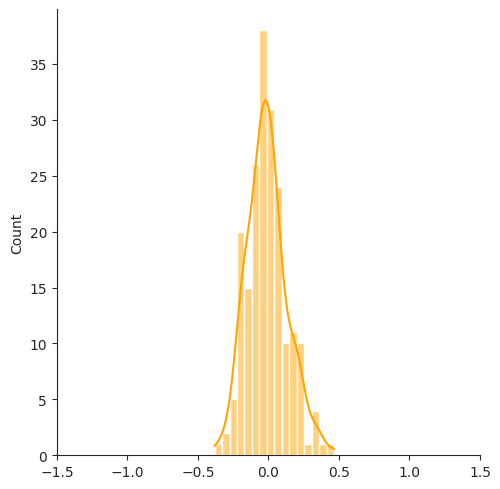

In [100]:
sns.displot(sample_mean_calculator(x, 50, 200), color='orange', kde=True)
_ = plt.xlim(-1.5, 1.5)

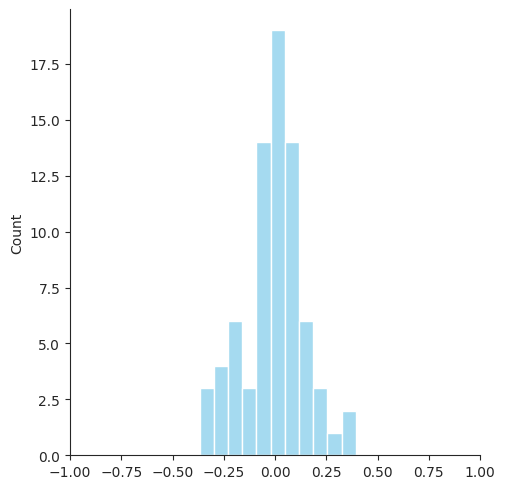

In [101]:
sns.displot(sample_mean_calculator(x, 50, 75), color='skyblue', kde=False)
_ = plt.xlim(-1, 1)

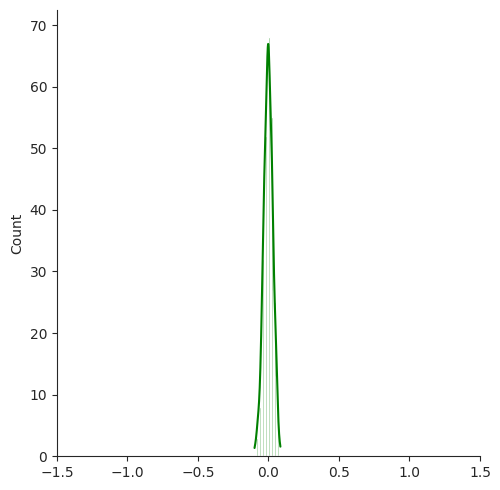

In [102]:
sns.displot(sample_mean_calculator(x, 1000, 500), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

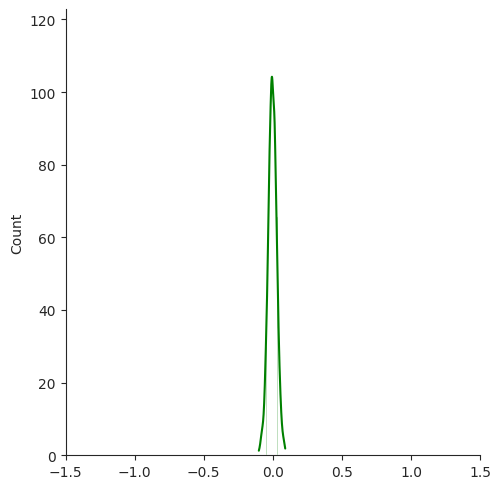

In [103]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

In [104]:
s = st.skewnorm.rvs(500, size=10000)

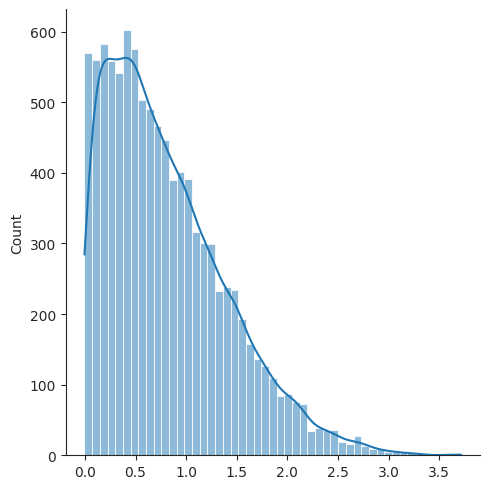

In [105]:
_ = sns.displot(s, kde=True)

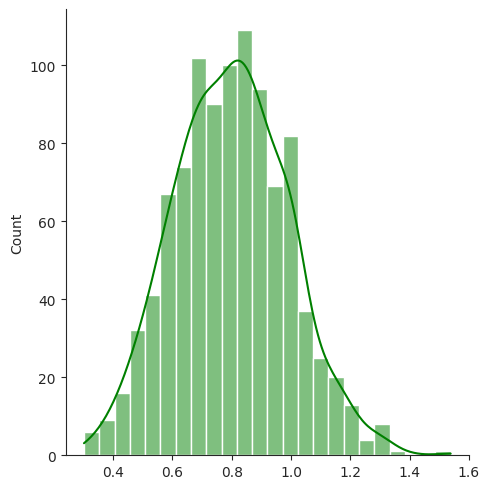

In [106]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

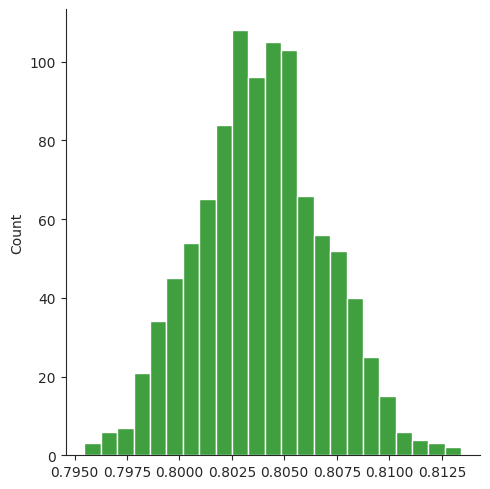

In [107]:
_ = sns.displot(sample_mean_calculator(s, 8000, 1000), color='green', kde=False)

In [108]:
m = np.concatenate((np.random.normal(loc = 5.0, size=3000), np.random.normal(loc =9.0, size=8000)))

m1 = np.concatenate((np.random.normal(loc = 12.0,size=15000), np.random.normal(loc = 14.0, size=15000),np.random.normal(loc = 5.0,size=8000), np.random.normal(loc = 1.0, size=5000), np.random.normal(loc =9.0, size=3000)))

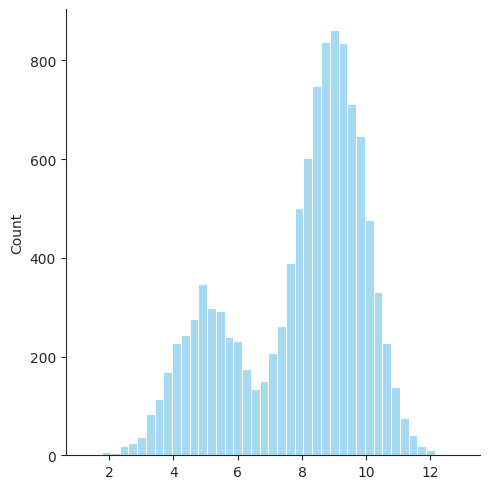

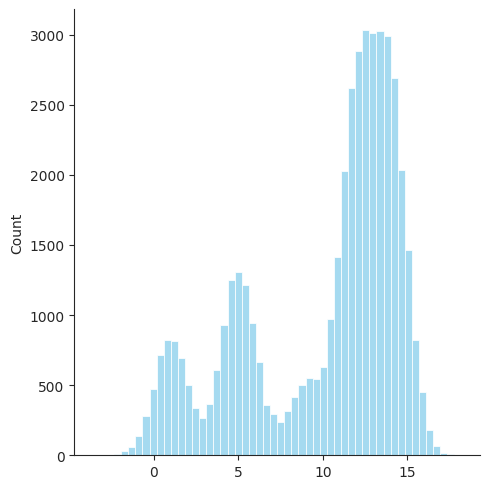

In [109]:
_ = sns.displot(m, kde=False ,color="skyBlue")
_ = sns.displot(m1, kde=False ,color="skyBlue")

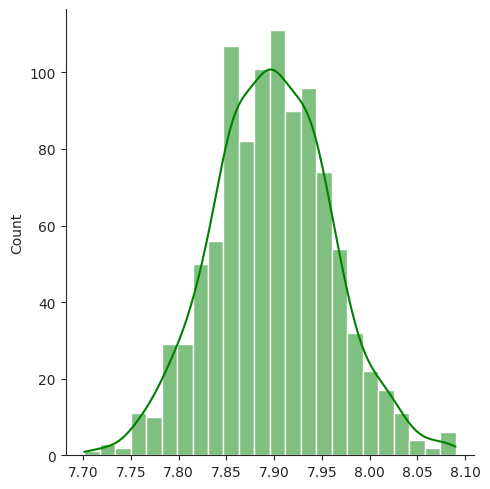

In [110]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

### Sampling from uniform

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal:

In [111]:
u = np.random.uniform(size=120000)

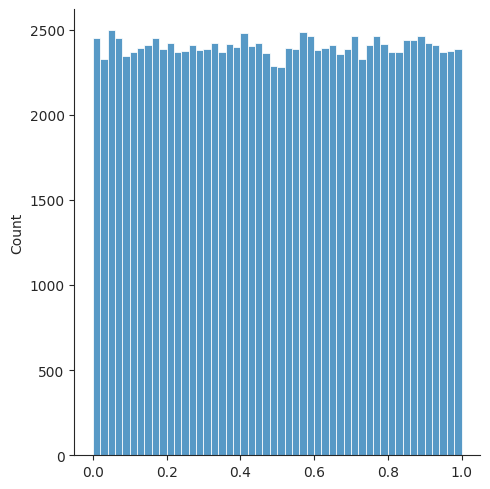

In [112]:
_ = sns.displot(u)

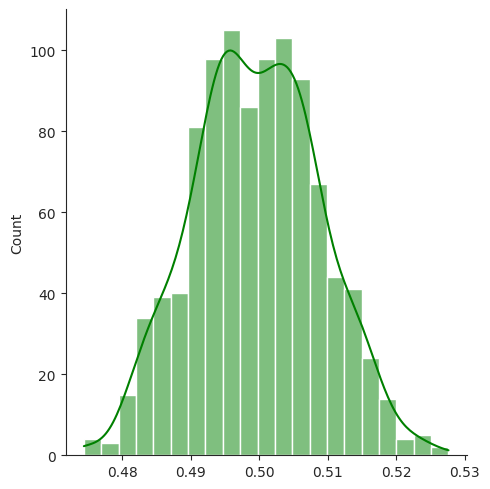

In [113]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" (covered shortly in *Intro to Stats*) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not.

# z-scores

Assuming normally-distributed data, a z-score indicates how many standard deviations away from the mean a data point (say, $x_i$) is:
$$ z = \frac{x_i-\mu}{\sigma} $$

That is, the formula *standardizes* a given score $x_i$ to the (standard normal) *z*-distribution. (As we covered in *Probability & Information Theory*, you could standardize any normal distribution to a mean of zero and standard deviation of one by subtracting its original mean and then dividing by its original standard deviation.)

In [114]:
x_i = 82
mu = 72
sigma = 3

In [115]:
x = np.random.normal(mu, sigma, 30000)

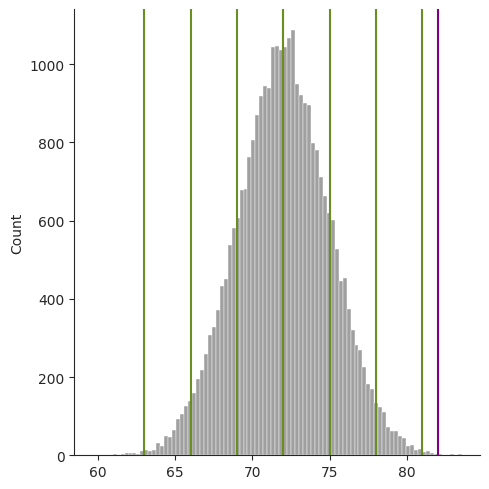

In [116]:
sns.displot(x, color='gray')
ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 0, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [117]:
z = (x_i - mu)/sigma
z

3.3333333333333335

In [118]:
z = (x_i - np.mean(x))/np.std(x)
z

3.323438126551569

In [119]:
len(np.where(x > 85)[0])

0

In [120]:
100*69/10000

0.69

In [121]:
np.percentile(x, 99)

79.05601970005154

In contrast, if the mean score of your peers is 95 and the standard deviation is 2:

In [122]:
mu = 95
sigma = 2

In [123]:
y = np.random.normal(mu, sigma, 100000)

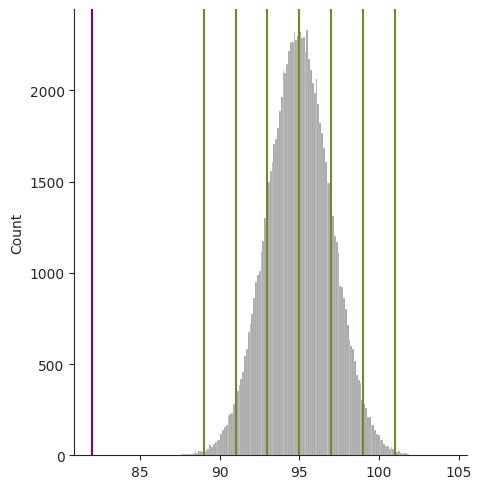

In [124]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 0, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Your z-score is 2.5 standard deviations *below* the mean (!):

In [125]:
z = (x_i - mu)/sigma
z

-6.5

In [126]:
z = (x_i - np.mean(y))/np.std(y)
z

-6.495734174167546